In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd  
import numpy as np  
import math
import matplotlib.pyplot as plt  
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/Article M&A/Ultimate_Dataset.csv')
df_train.head()

,Unnamed: 0,Index,Date,Target,Sector,Country,Transaction Type,Deal Value,Inv,stockPrice_year-1,stockPrice_year,stockPrice_year+1,earningsPerShare_year-1,earningsPerShare_year,earningsPerShare_year+1,debtEquityRatio_year-1,debtEquityRatio_year,debtEquityRatio_year+1,netProfitMargin_year-1,netProfitMargin_year,netProfitMargin_year+1,inventoryTurnover_year-1,inventoryTurnover_year,inventoryTurnover_year+1,currentRatio_year-1,currentRatio_year,currentRatio_year+1,addTotalDebt_year-1,addTotalDebt_year,addTotalDebt_year+1,enterpriseValue_year-1,enterpriseValue_year,enterpriseValue_year+1
0,0,0,2000.0,SmithKline Beecham Ltd.,Life Science,United Kingdom,Merger,75700.0,"GlaxoSmithKline plc, 980 Great West Road, Bren...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2000.0,"Etec Systems, Inc.",Semiconductors,United States,Add-on Acquisition,1800.0,"Applied Materials, Inc., 3050 Bowers Avenue, P...",18.4289,15.5327,15.876,0.49750,1.20140,0.29971,0.546488,0.484375,0.292099,0.153670,0.215809,0.069182,4.010273,3.130984,2.895258,3.031329,3.202536,5.076321,2.521600e+09,668000000.0,565000000.0,2.937062e+10,2.570518e+10,2.611882e+10
2,2,2,2000.0,"Sirius XM Holdings, Inc.",Media,United States,Stake Purchase,1591.0,"The Blackstone Group Inc. (PE), 345 Park Avenu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,2000.0,"UST, Corp.",Financial Services,United States,Add-on Acquisition,1412.0,"Citizens Financial Group, Inc., One Citizens P...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,2000.0,"Interleaf, Inc.",Software,United States,Add-on Acquisition,851.0,"BroadVision, Inc., 460 Seaport Court Suite 102...",9996.0000,3222.0000,531.000,15.66667,-134.66667,-696.91667,0.176419,0.132468,0.932053,0.162771,-0.390432,-3.420450,NaN,NaN,NaN,9.649746,2.674942,1.765169,4.900000e+06,3900000.0,2900000.0,1.172030e+10,3.717200e+09,5.643000e+08


In [ ]:
df_train.shape

(3282, 33)

Skewness Co-efficient: 10.495


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


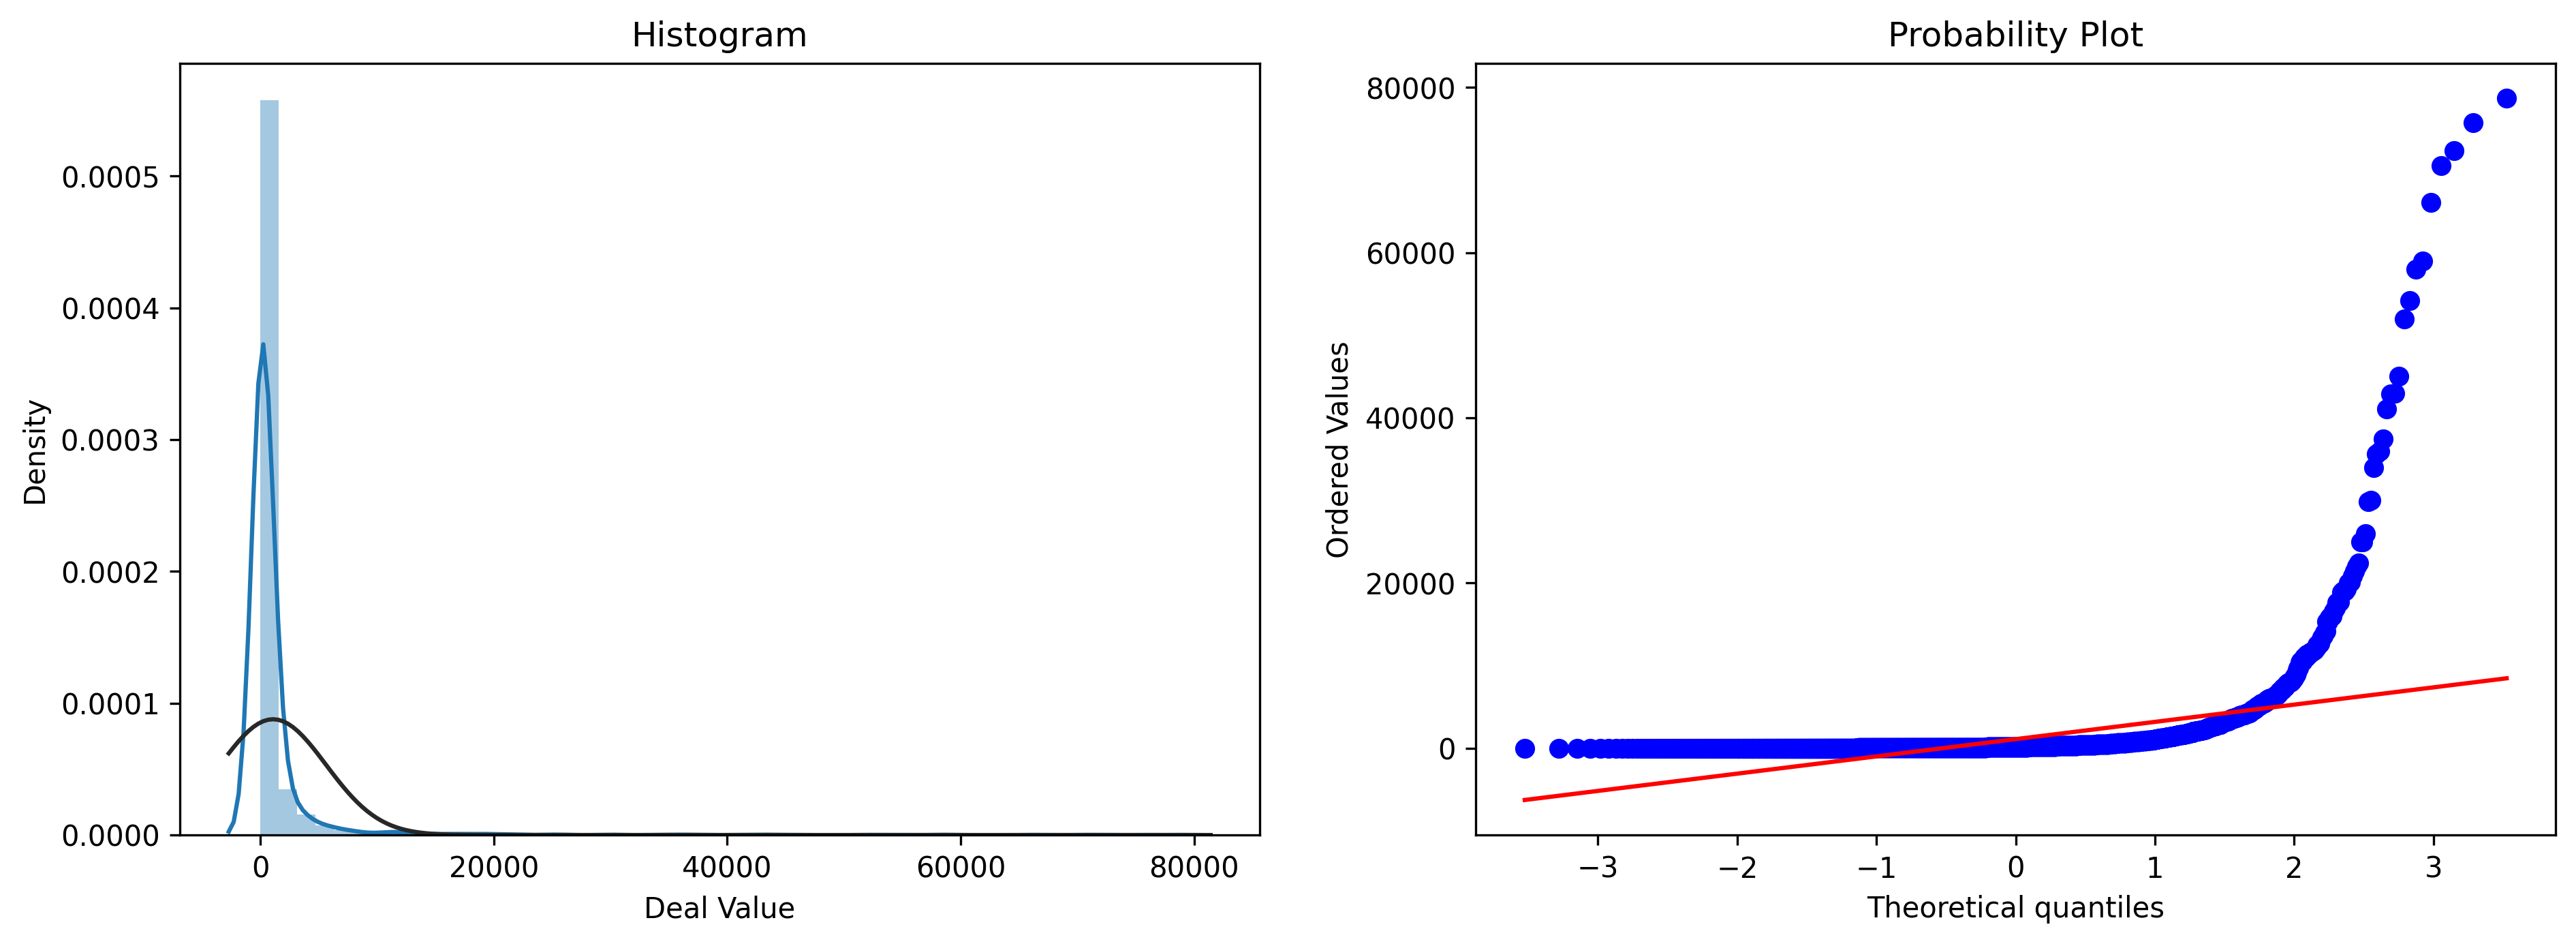

In [ ]:
print(f"Skewness Co-efficient: {round(df_train['Deal Value'].skew(), 3)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

##### HISTOGRAM #####
from scipy import stats
sns.distplot(df_train['Deal Value'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

##### PROBABILITY / QQ PLOT #####
stats.probplot(df_train['Deal Value'], plot=ax2)

plt.show()

In [ ]:
df_train['Date'] = df_train['Date'].astype('float').astype('Int64')
df_train.dtypes

Unnamed: 0                    int64
Index                         int64
Date                          Int64
Target                       object
Sector                       object
Country                      object
Transaction Type             object
Deal Value                  float64
Inv                          object
stockPrice_year-1           float64
stockPrice_year             float64
stockPrice_year+1           float64
earningsPerShare_year-1     float64
earningsPerShare_year       float64
earningsPerShare_year+1     float64
debtEquityRatio_year-1      float64
debtEquityRatio_year        float64
debtEquityRatio_year+1      float64
netProfitMargin_year-1      float64
netProfitMargin_year        float64
netProfitMargin_year+1      float64
inventoryTurnover_year-1    float64
inventoryTurnover_year      float64
inventoryTurnover_year+1    float64
currentRatio_year-1         float64
currentRatio_year           float64
currentRatio_year+1         float64
addTotalDebt_year-1         

In [ ]:
df_train.drop(['Unnamed: 0','Target','Inv','Target'], axis='columns', inplace=True)

In [ ]:
df_train.isna().sum()

Index                          0
Date                           0
Sector                         1
Country                        6
Transaction Type               0
Deal Value                     0
stockPrice_year-1            722
stockPrice_year              635
stockPrice_year+1            748
earningsPerShare_year-1      701
earningsPerShare_year        613
earningsPerShare_year+1      736
debtEquityRatio_year-1       786
debtEquityRatio_year         698
debtEquityRatio_year+1       810
netProfitMargin_year-1       750
netProfitMargin_year         655
netProfitMargin_year+1       772
inventoryTurnover_year-1    1697
inventoryTurnover_year      1648
inventoryTurnover_year+1    1728
currentRatio_year-1          747
currentRatio_year            658
currentRatio_year+1          770
addTotalDebt_year-1          722
addTotalDebt_year            635
addTotalDebt_year+1          748
enterpriseValue_year-1       722
enterpriseValue_year         635
enterpriseValue_year+1       748
dtype: int

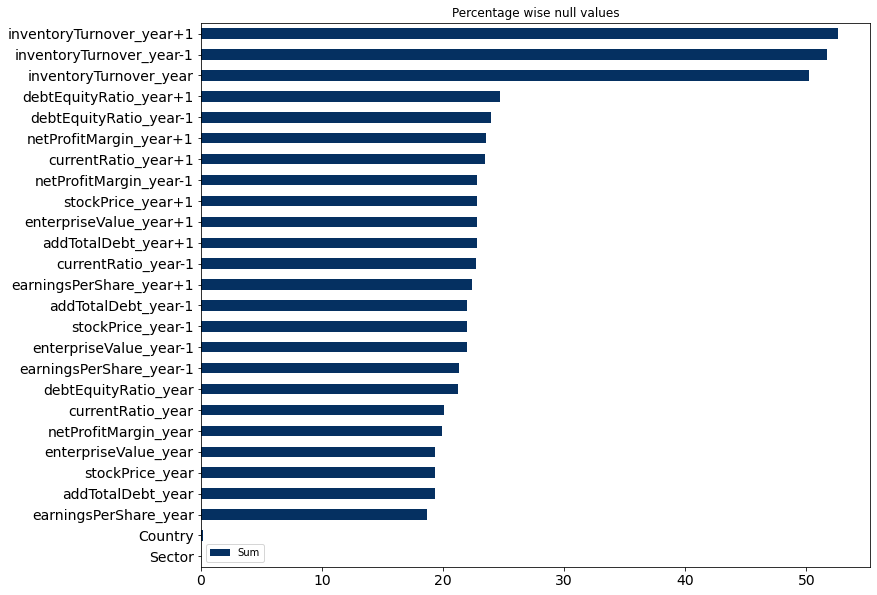

In [ ]:
## Get the dataframe with all the features and SUM of the NaN values present
df_null_count = df_train.isnull().sum().to_frame().rename({0:"Sum"}, axis=1)

## Select only those features who have atleast 1 NaN value
df_null_count = df_null_count[df_null_count['Sum'] > 0]

## Change the SUM to PERCENTAGE 
df_null_count['Sum'] = df_null_count['Sum']*(100/3282)

## Plot a Horizontal Bar Graph
df_null_count.sort_values(by="Sum", ascending=True).plot(
    kind='barh', figsize=(12,10), fontsize=14, colormap="RdBu_r", title="Percentage wise null values"
)
plt.show()


In [ ]:
df_train.corr()['Deal Value'].apply(abs).sort_values()

currentRatio_year+1         0.001006
earningsPerShare_year       0.001451
earningsPerShare_year+1     0.003159
netProfitMargin_year-1      0.003250
enterpriseValue_year+1      0.003755
enterpriseValue_year        0.003784
debtEquityRatio_year        0.003948
addTotalDebt_year+1         0.004185
addTotalDebt_year           0.004226
addTotalDebt_year-1         0.004356
stockPrice_year             0.004491
stockPrice_year-1           0.004494
stockPrice_year+1           0.004868
enterpriseValue_year-1      0.005587
netProfitMargin_year        0.006046
earningsPerShare_year-1     0.006361
Index                       0.008920
currentRatio_year           0.010349
inventoryTurnover_year-1    0.014579
currentRatio_year-1         0.016476
debtEquityRatio_year-1      0.017609
Date                        0.017737
inventoryTurnover_year      0.018738
inventoryTurnover_year+1    0.018880
debtEquityRatio_year+1      0.022351
netProfitMargin_year+1      0.026917
Deal Value                  1.000000
N

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


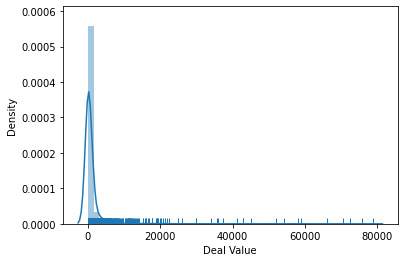

In [ ]:
df_numeric = df_train.select_dtypes(include='number')
sns.distplot(df_numeric['Deal Value'], bins=50, kde=True, rug=True)

In [ ]:
df_numeric = df_train.select_dtypes(include='number')
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_numeric = pd.DataFrame(imputer.fit_transform(df_numeric),columns = df_numeric.columns)

In [ ]:
df_non_numeric = df_train.select_dtypes(exclude='number')
df_non_numeric.shape

(3282, 3)

In [ ]:
df=pd.concat([df_non_numeric,df_numeric],axis=1)

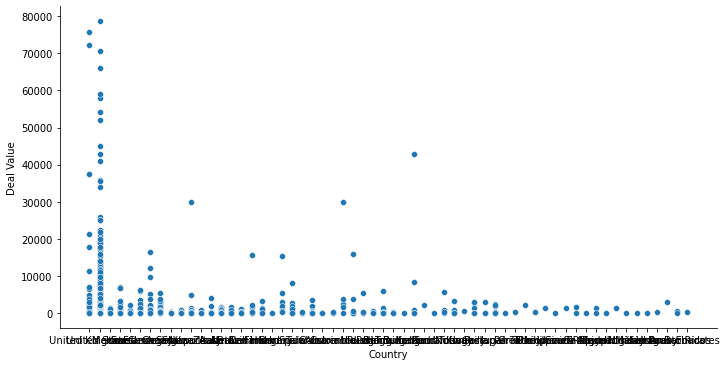

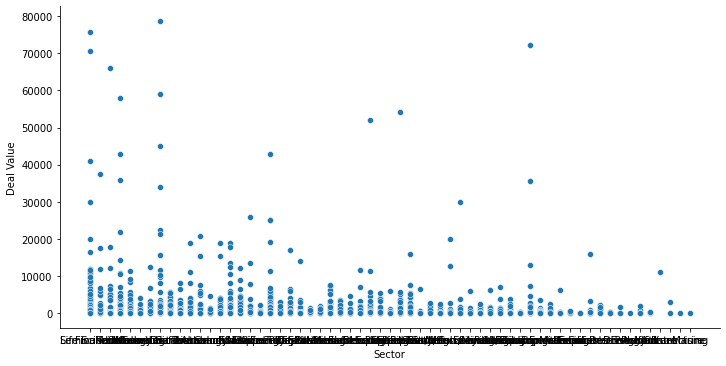

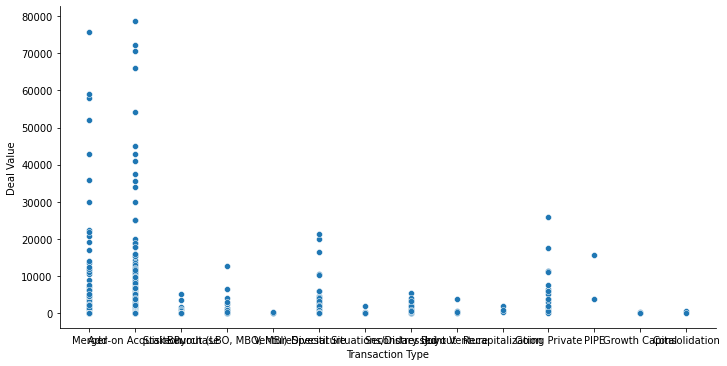

In [ ]:
#Plotting Categorical Variables
sns.relplot(x='Country', y='Deal Value', data=df, aspect=2.0)
sns.relplot(x='Sector', y='Deal Value', data=df, aspect=2.0)
sns.relplot(x='Transaction Type', y='Deal Value', data=df, aspect=2.0)

In [ ]:
def plot_numeric_features(feature):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=110)

    sns.distplot(df[feature], ax=ax1)
    sns.scatterplot(df[feature], df["Deal Value"], ax=ax2)
    sns.boxplot(df[feature], ax=ax3, orient='v', width=0.2)

    print("Skewness Coefficient of LotFrontage is %.2f" %df[feature].skew())
    ax1.set_yticks([])
    
    return plt

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 0.00


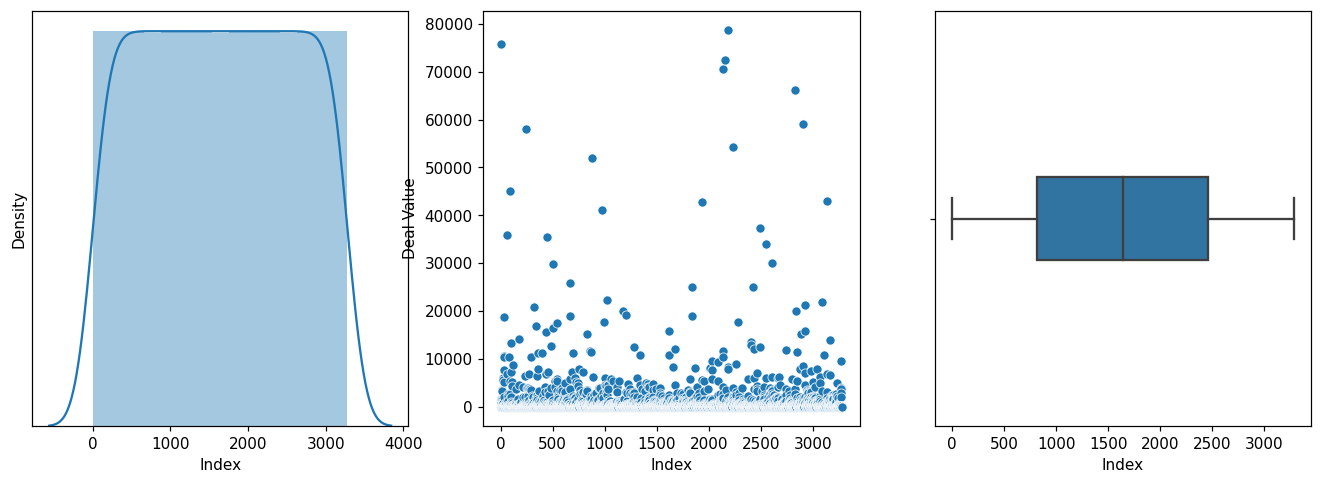

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is -0.53


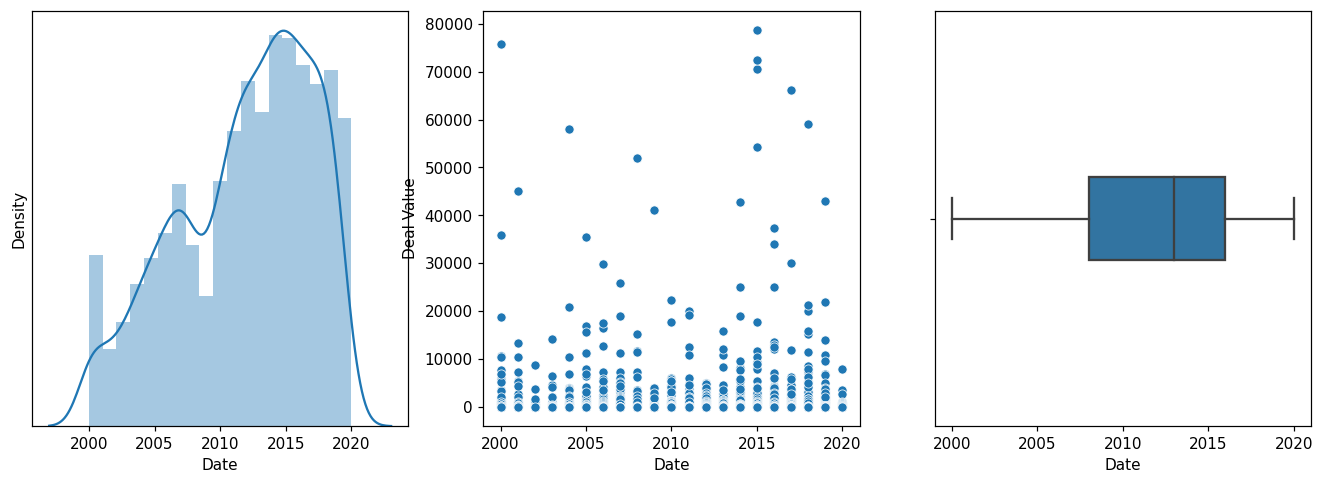

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 57.28


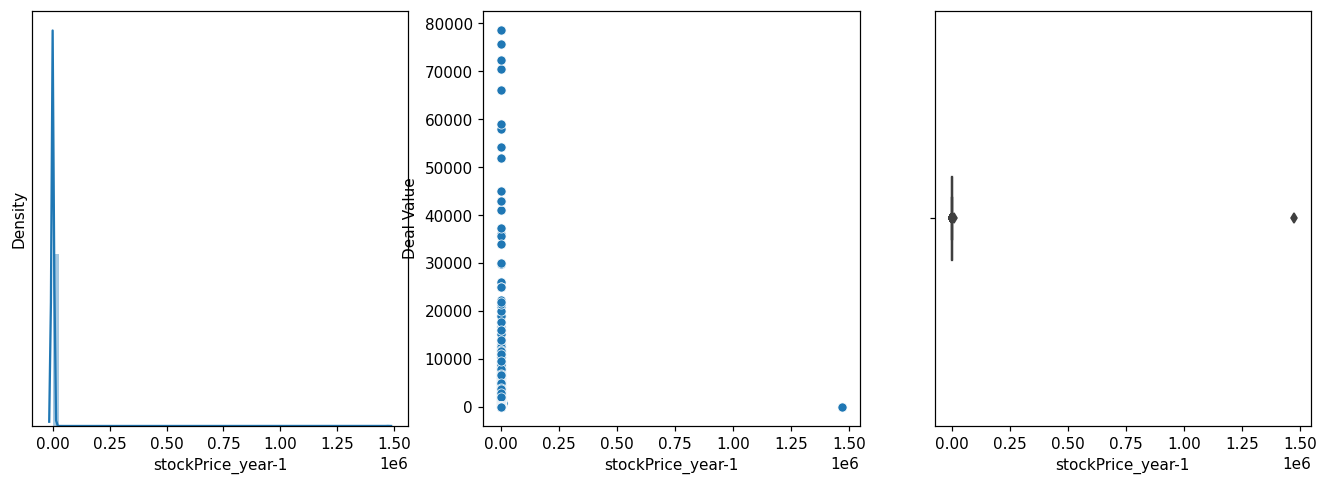

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 57.29


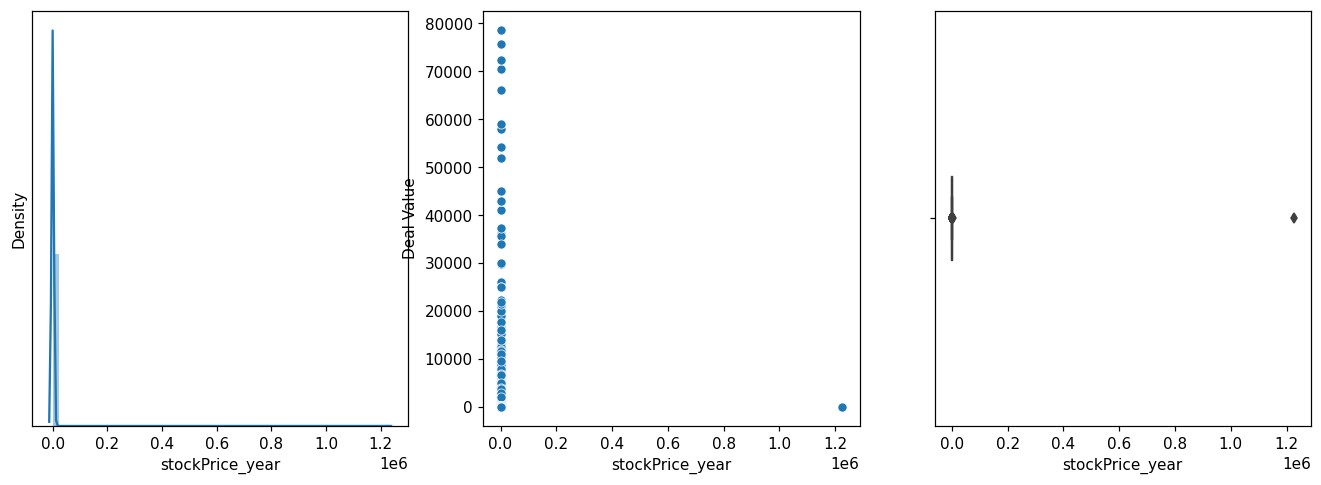

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 57.26


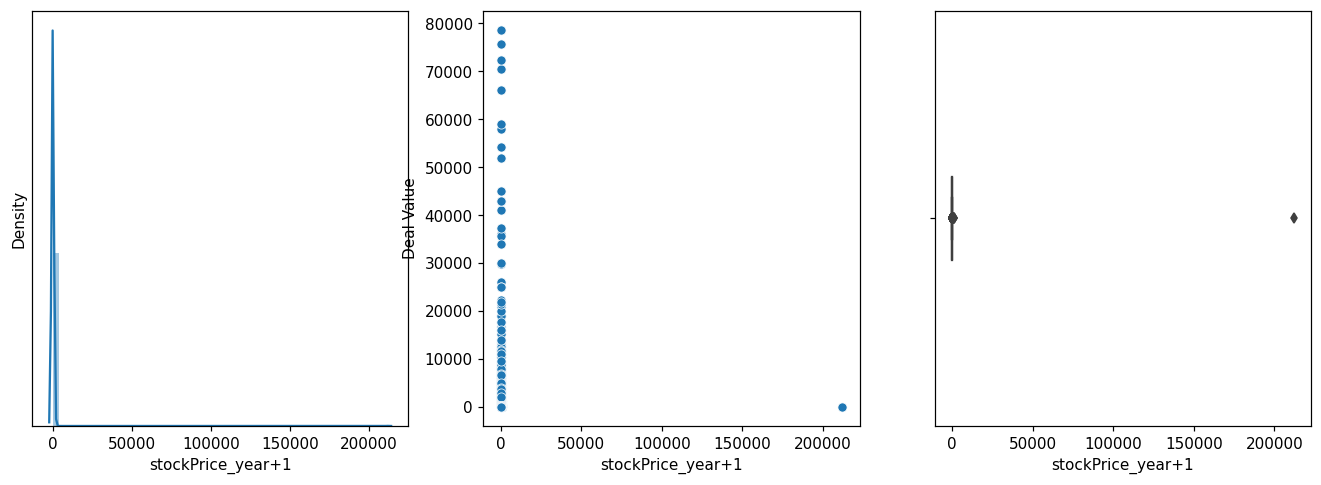

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 30.50


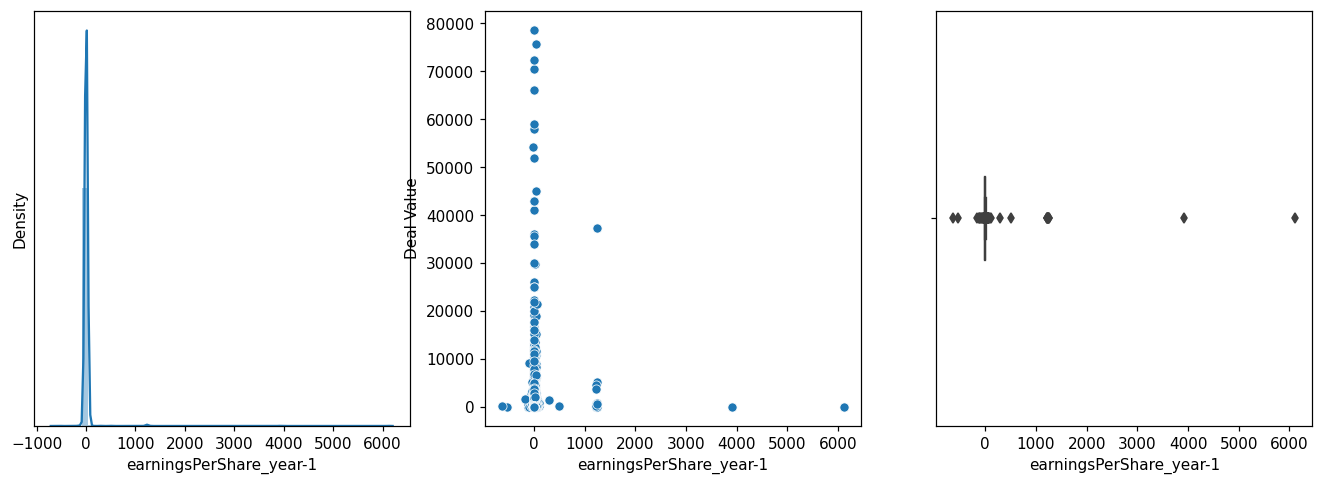

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is -6.50


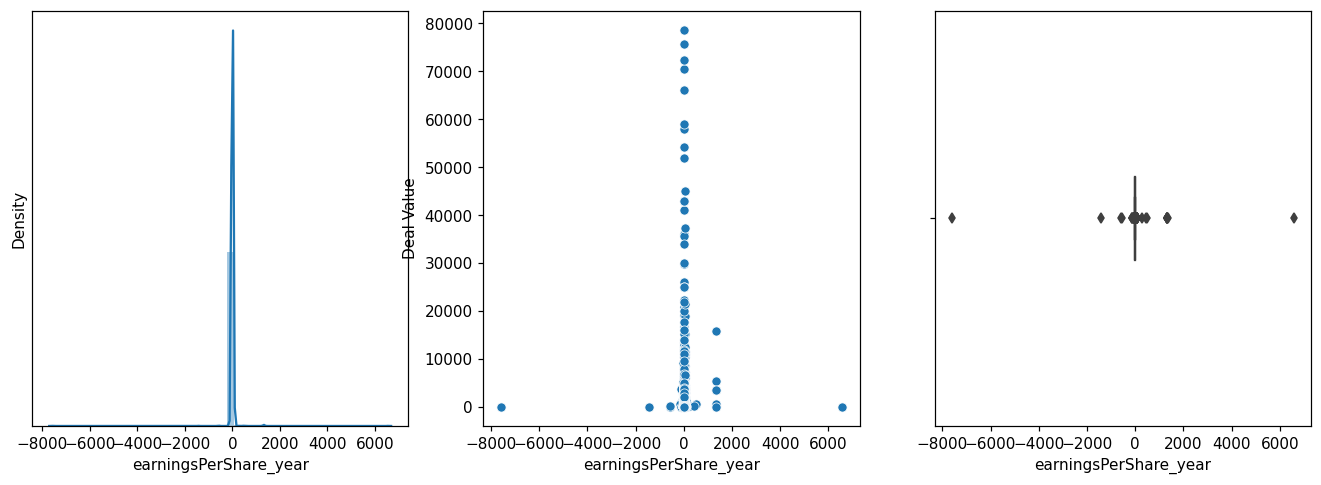

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is -47.13


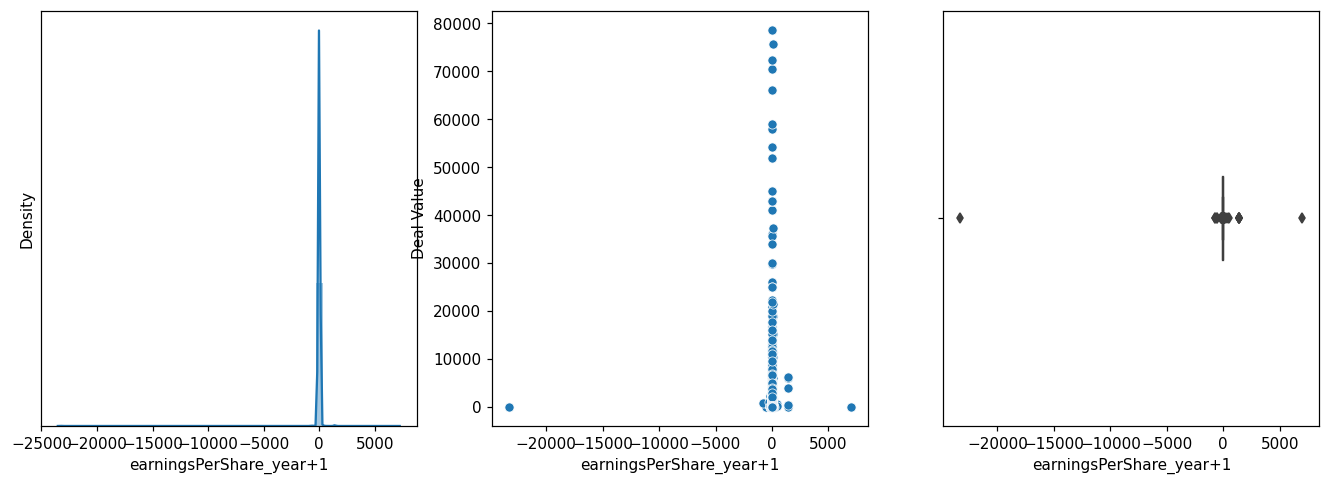

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 33.84


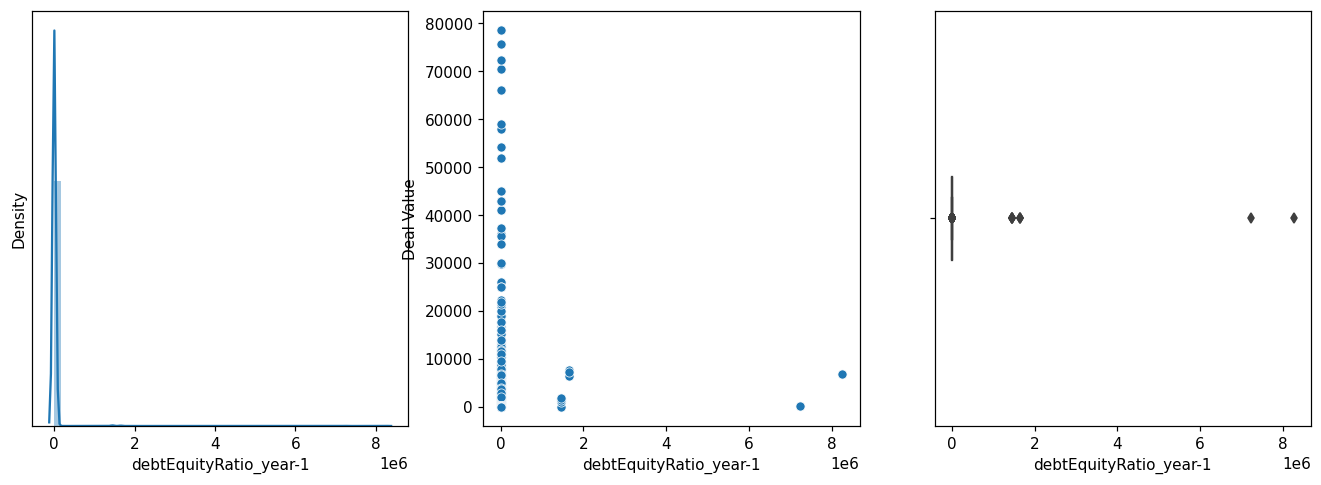

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 45.32


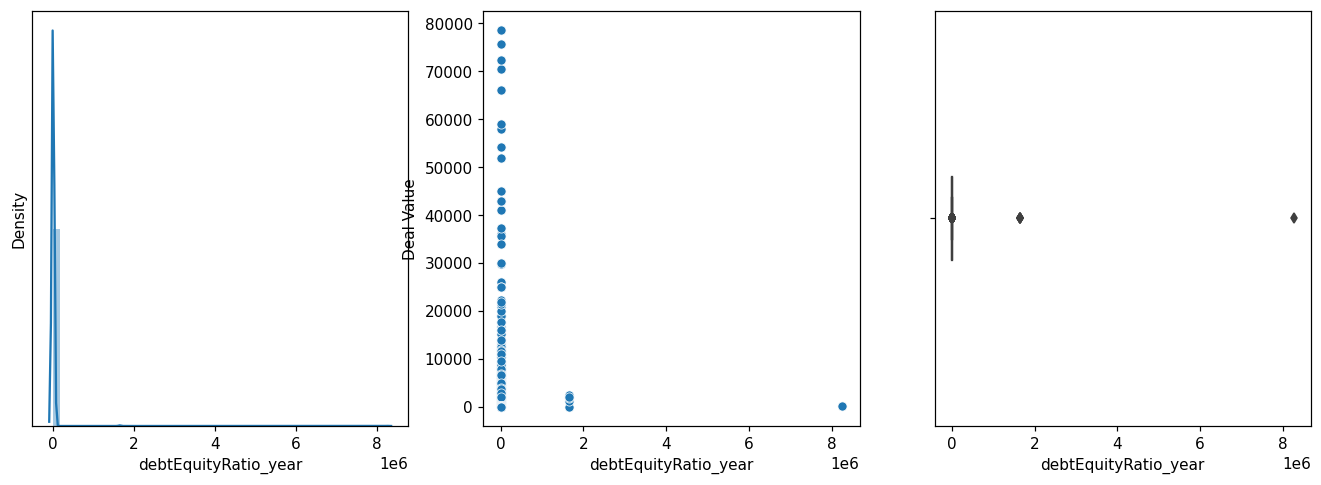

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 21.20


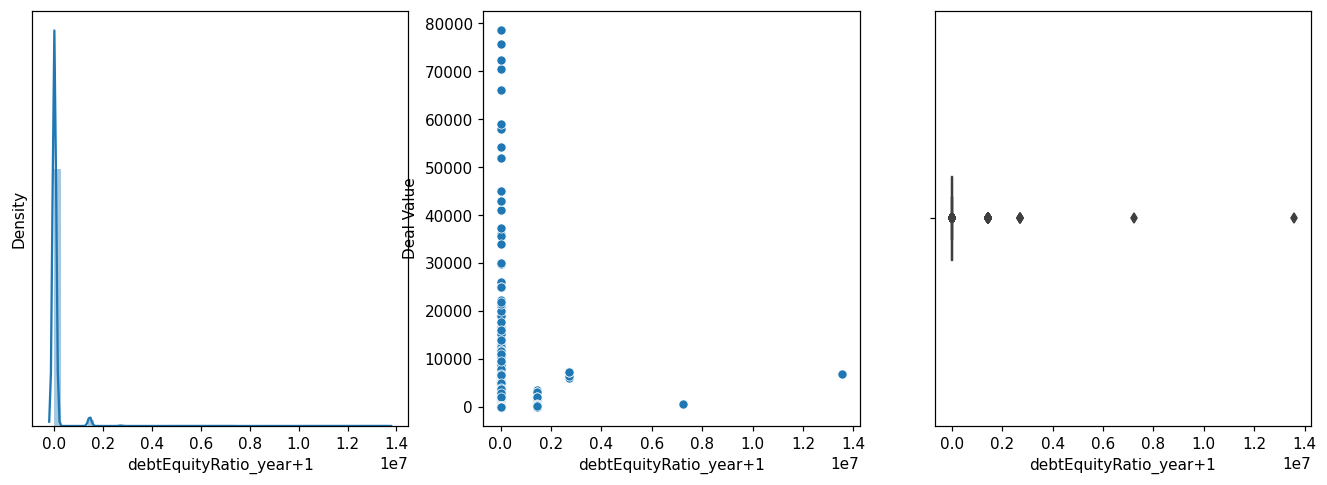

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is -38.74


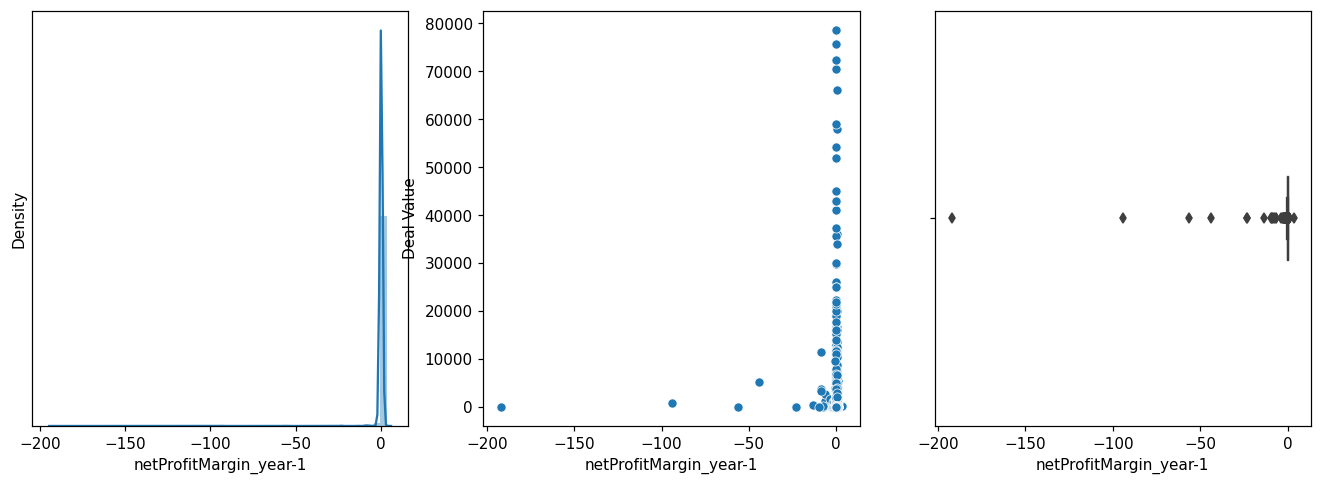

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is -25.52


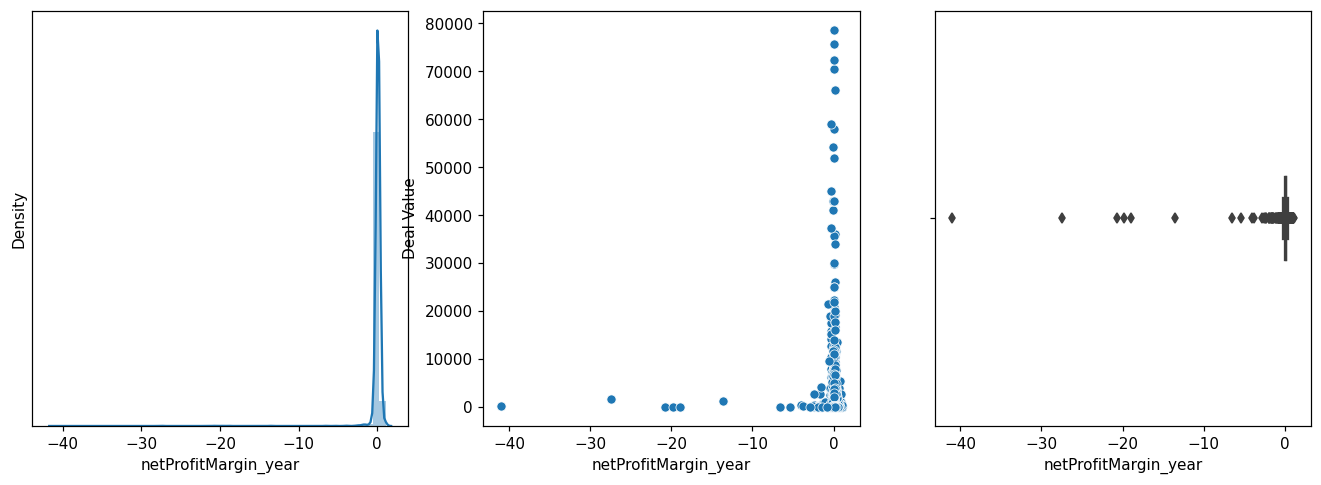

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is -11.44


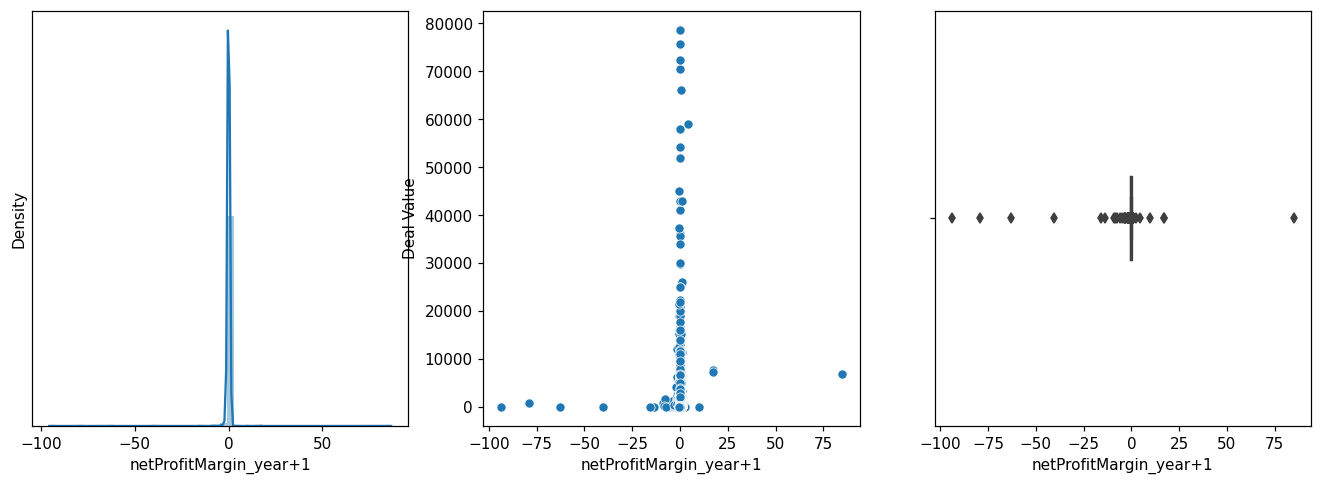

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 12.47


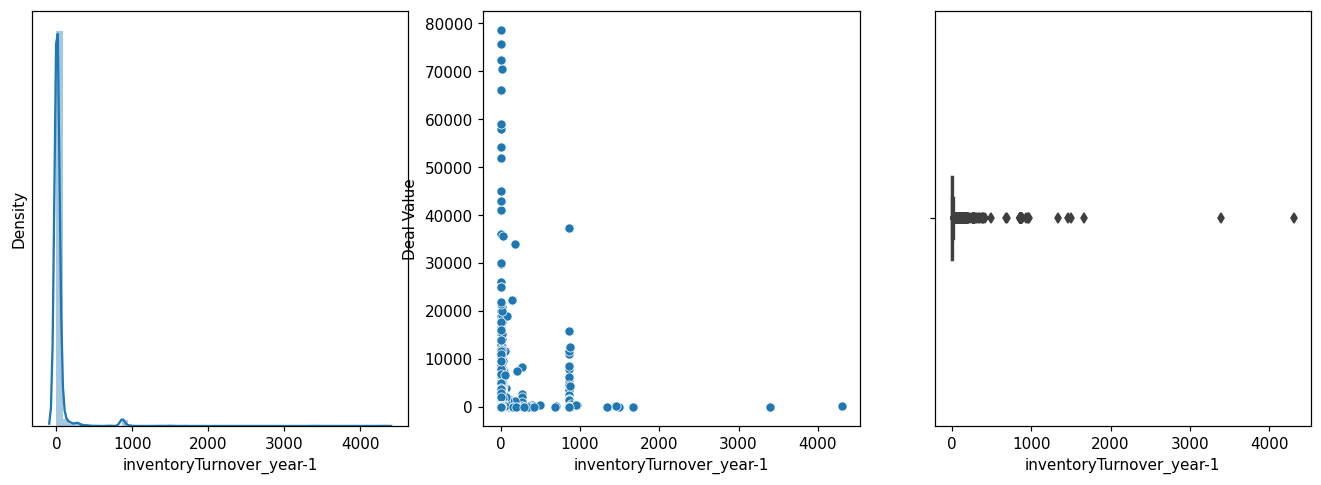

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 15.49


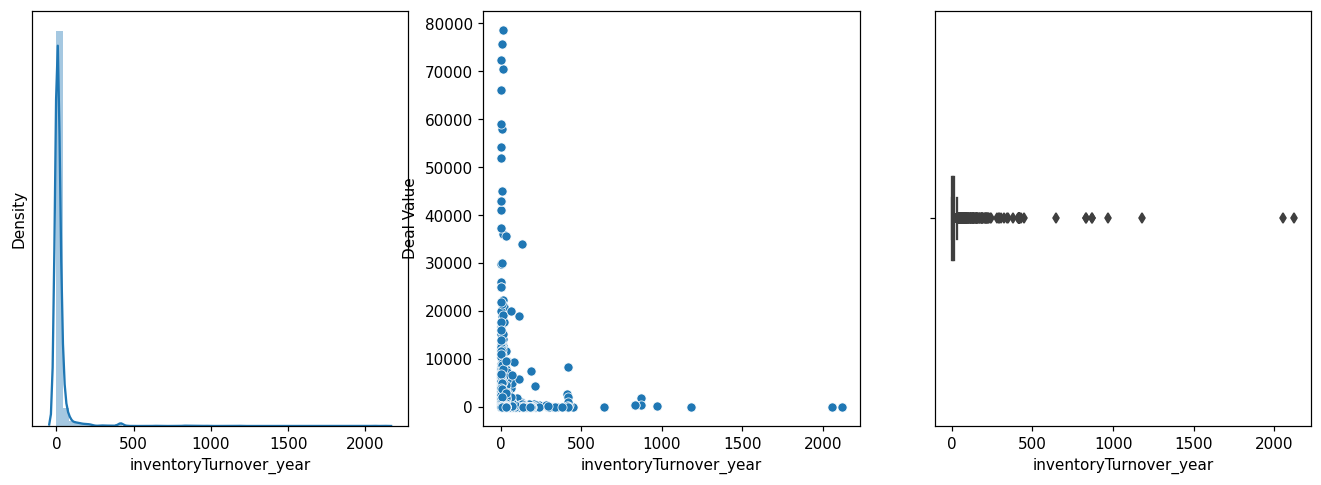

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 29.93


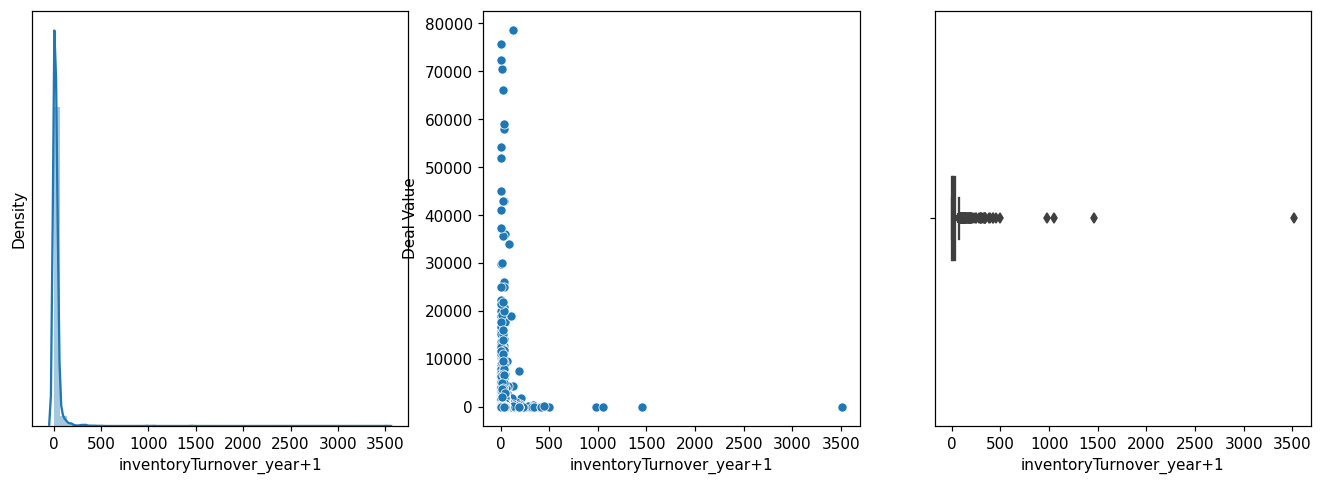

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 5.48


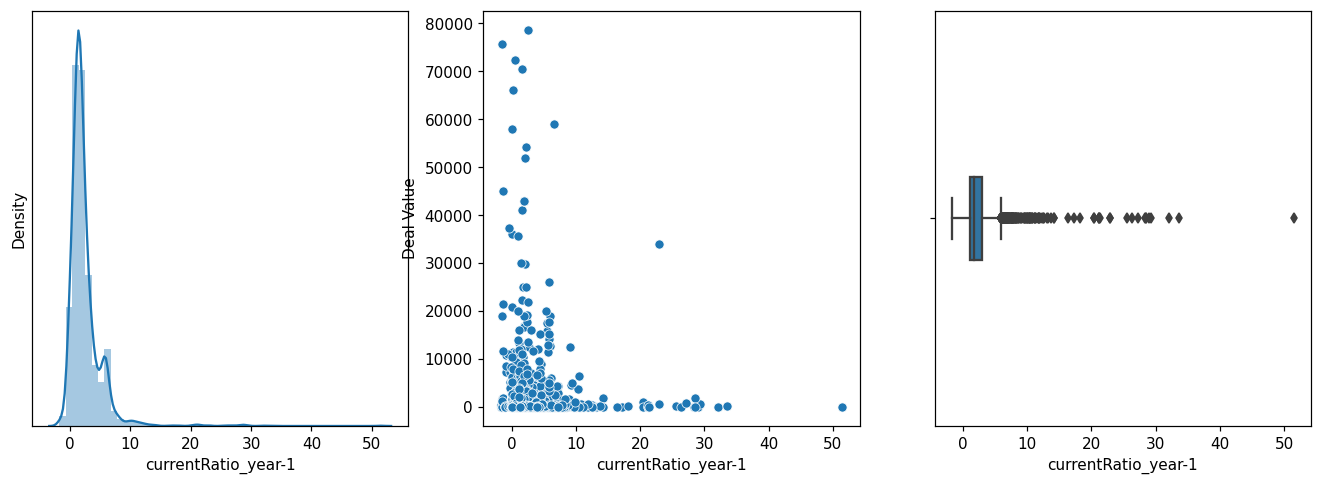

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 7.99


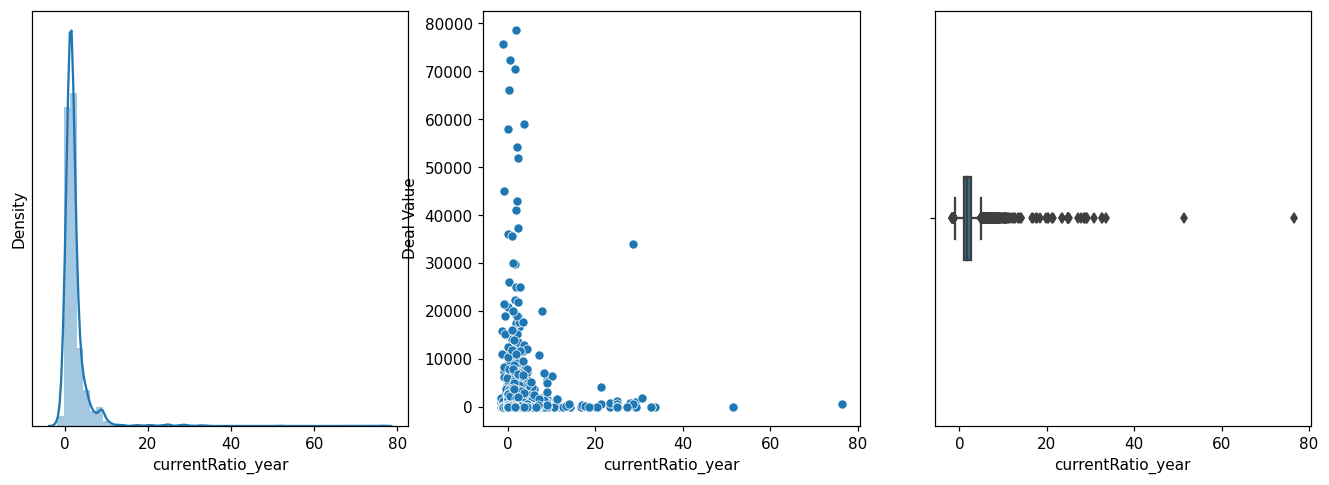

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 9.53


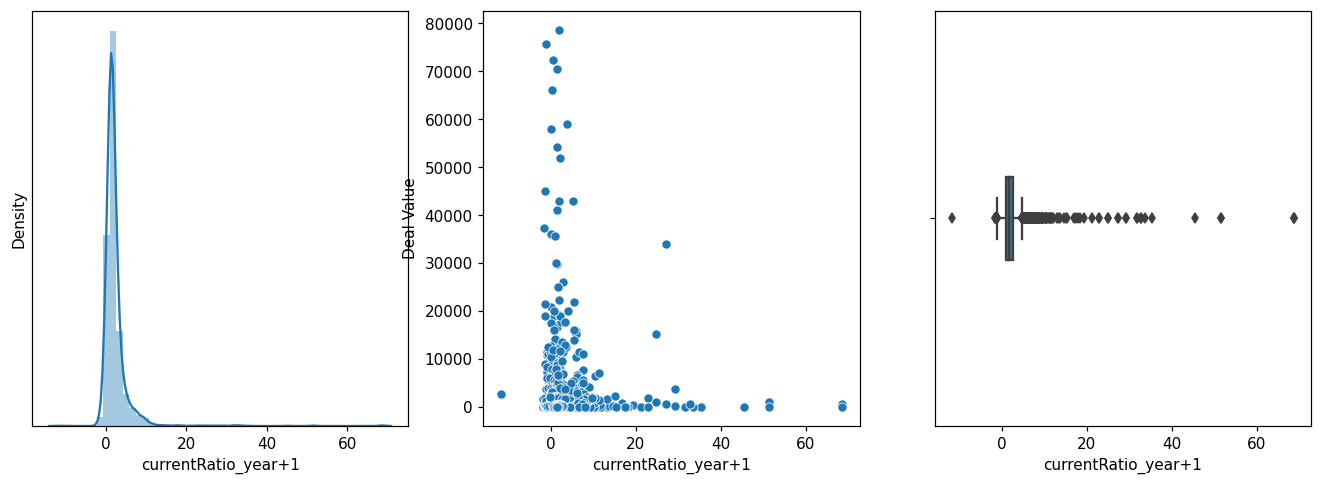

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 29.83


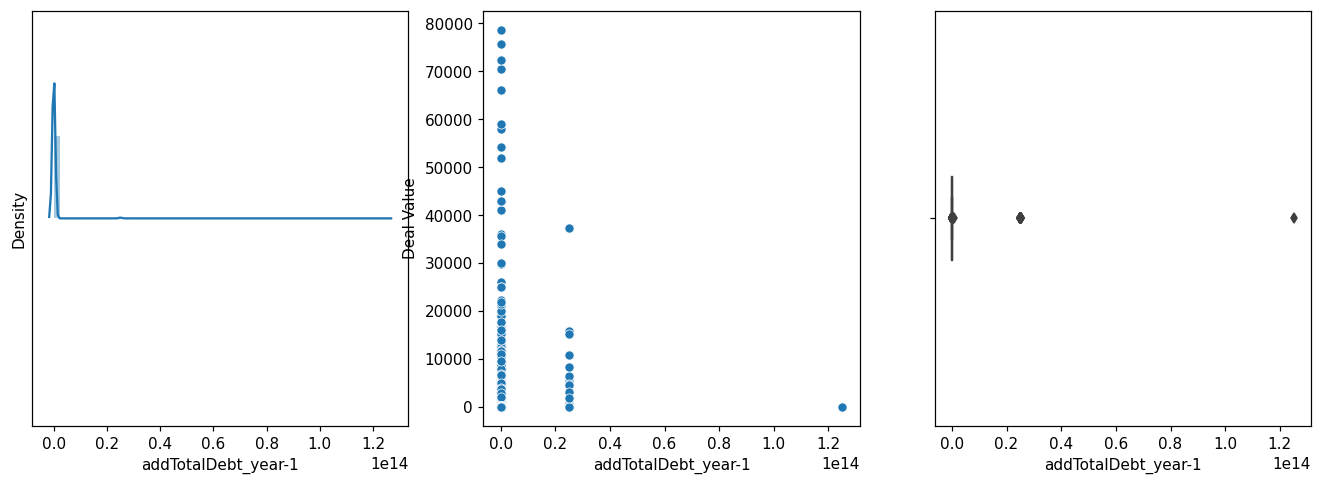

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 31.64


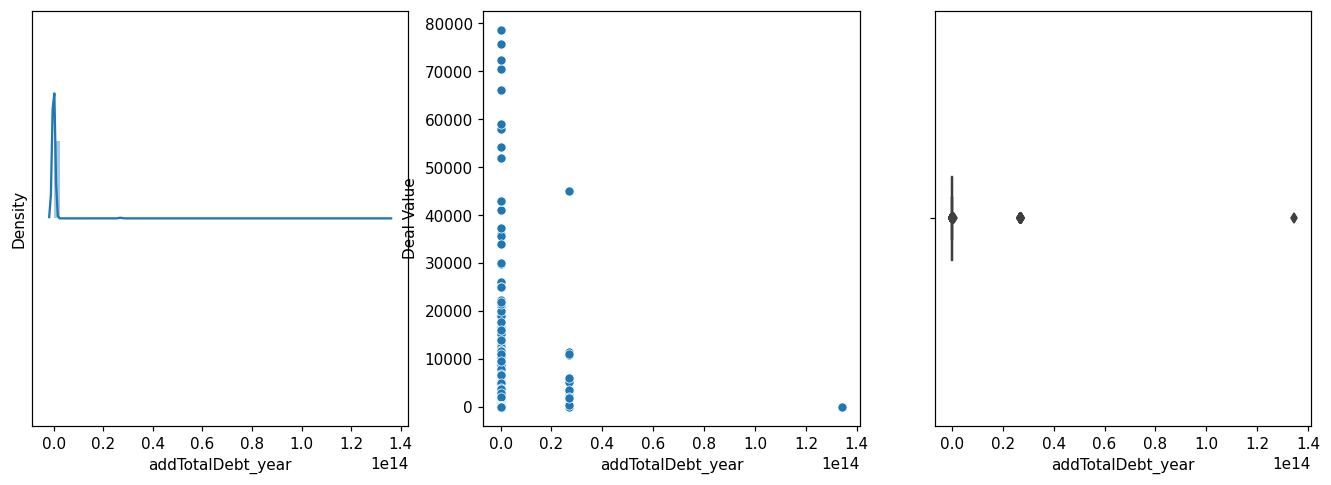

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 33.73


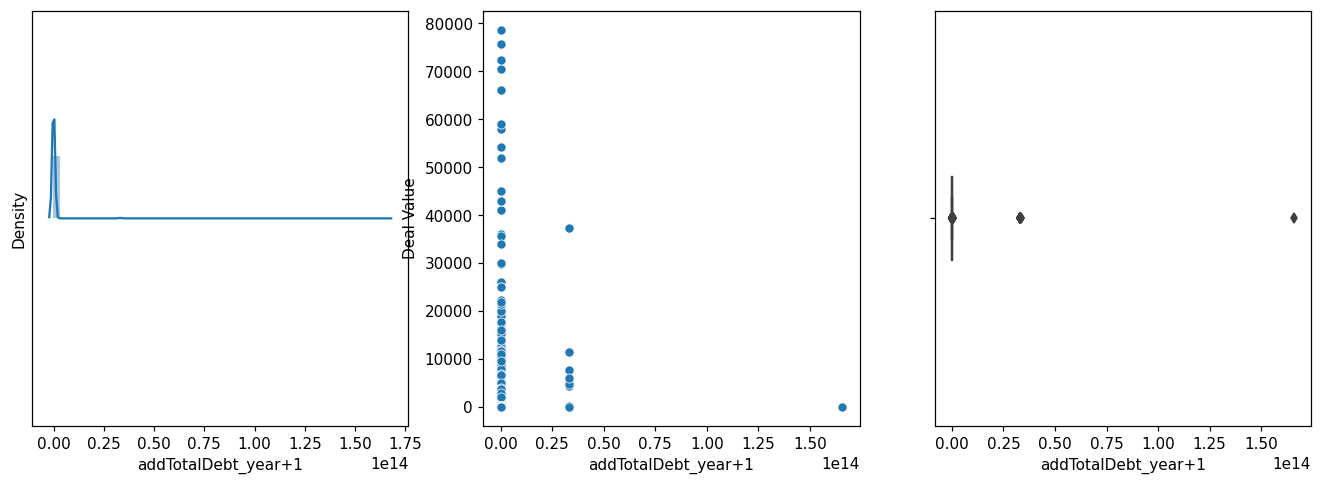

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 15.52


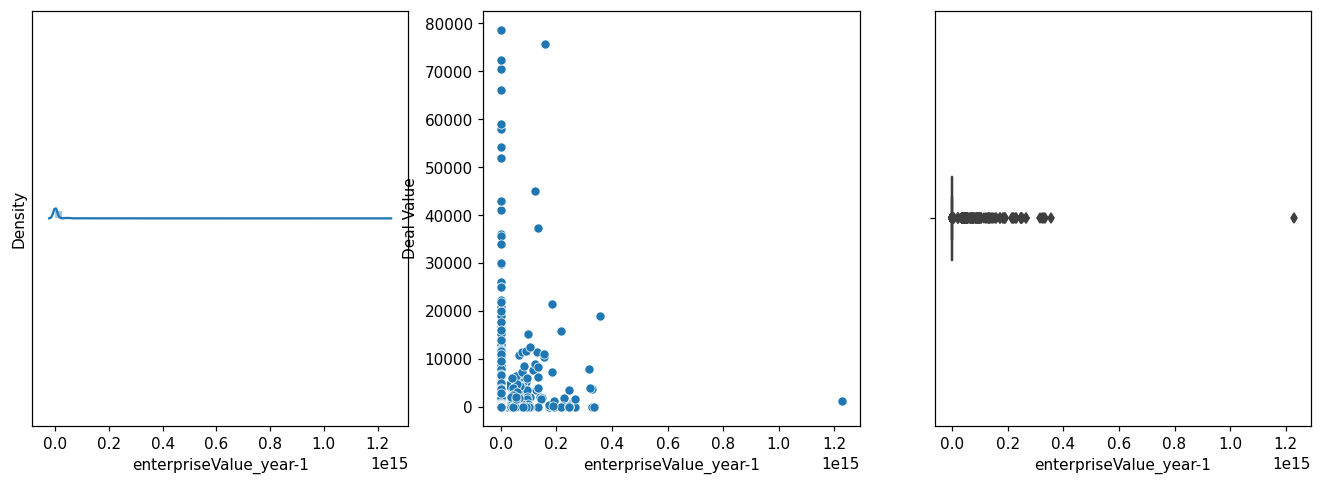

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 24.31


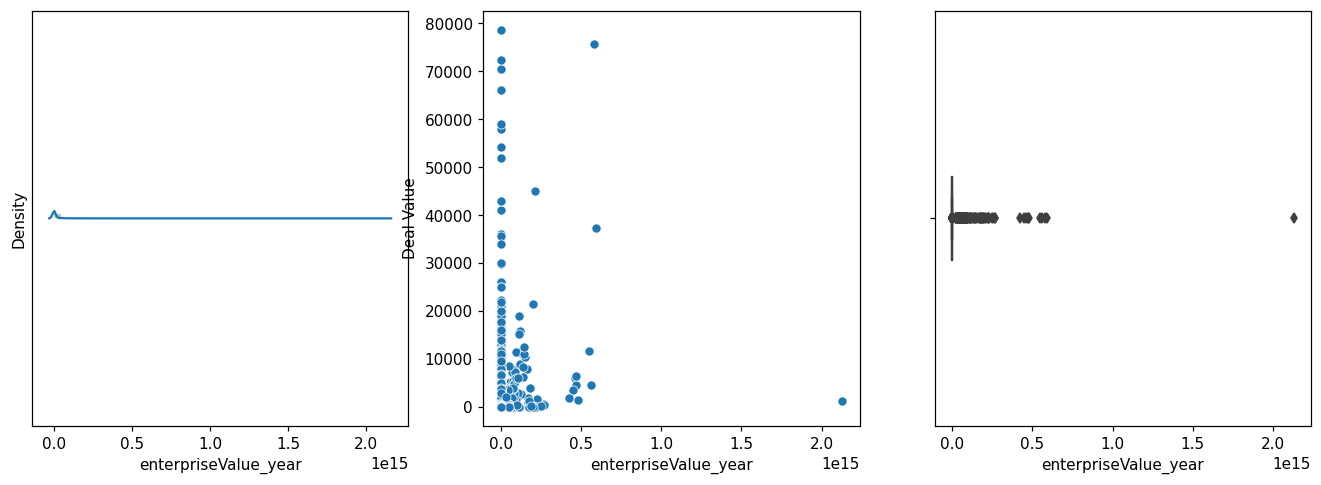

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

Skewness Coefficient of LotFrontage is 36.94


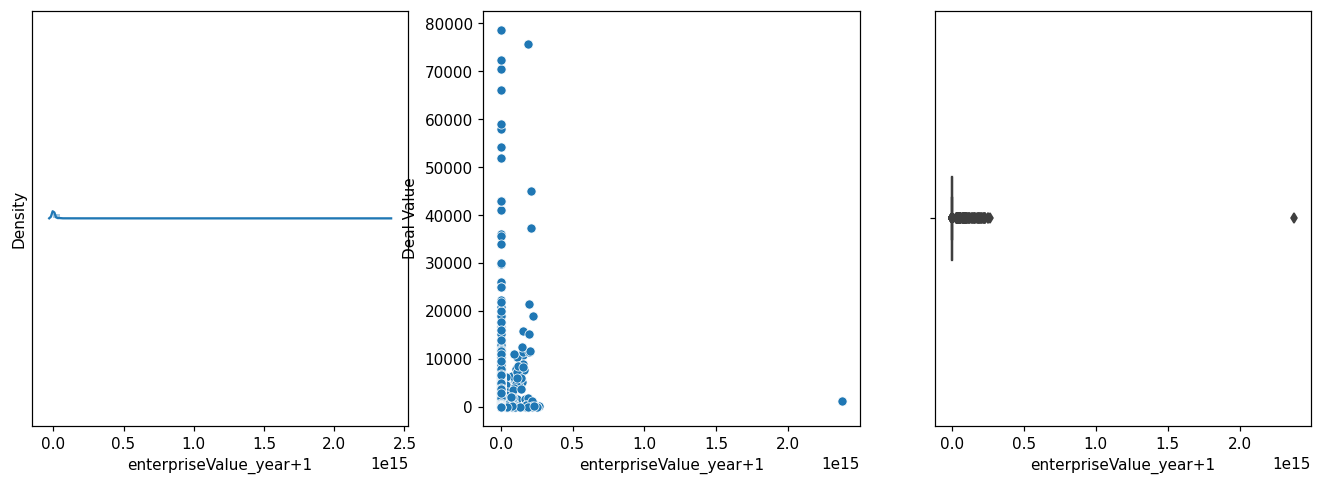

In [ ]:
plot_numeric_features("Index").show()
plot_numeric_features("Date").show()
plot_numeric_features("stockPrice_year-1").show()
plot_numeric_features("stockPrice_year").show()
plot_numeric_features("stockPrice_year+1").show()
plot_numeric_features("earningsPerShare_year-1").show()
plot_numeric_features("earningsPerShare_year").show()
plot_numeric_features("earningsPerShare_year+1").show()
plot_numeric_features("debtEquityRatio_year-1").show()
plot_numeric_features("debtEquityRatio_year").show()
plot_numeric_features("debtEquityRatio_year+1").show()
plot_numeric_features("netProfitMargin_year-1").show()
plot_numeric_features("netProfitMargin_year").show()
plot_numeric_features("netProfitMargin_year+1").show()
plot_numeric_features("inventoryTurnover_year-1").show()
plot_numeric_features("inventoryTurnover_year").show()
plot_numeric_features("inventoryTurnover_year+1").show()
plot_numeric_features("currentRatio_year-1").show()
plot_numeric_features("currentRatio_year").show()
plot_numeric_features("currentRatio_year+1").show()
plot_numeric_features("addTotalDebt_year-1").show()
plot_numeric_features("addTotalDebt_year").show()
plot_numeric_features("addTotalDebt_year+1").show()
plot_numeric_features("enterpriseValue_year-1").show()
plot_numeric_features("enterpriseValue_year").show()
plot_numeric_features("enterpriseValue_year+1").show()

In [ ]:
(df_train['Transaction Type'].value_counts()/df_train['Transaction Type'].count())*100

Add-on Acquisition               75.441804
Divestiture                      16.544790
Merger                            2.955515
Buyout (LBO, MBO, MBI)            1.432054
Secondary Buyout                  1.096892
Stake Purchase                    0.944546
Going Private                     0.792200
Special Situations/Distressed     0.274223
Joint Venture                     0.121877
Growth Capital                    0.091408
Recapitalization                  0.091408
Venture                           0.091408
Consolidation                     0.060938
PIPE                              0.060938
Name: Transaction Type, dtype: float64

In [ ]:
drop_index = df['Deal Value'][df['Deal Value'] > 1000].index

In [ ]:
df = df.drop(drop_index).reset_index(drop=True)
df.shape

(2750, 30)

In [ ]:
dummy = pd.get_dummies(df['Country'])
dummy1 = dummy.drop(['Argentina','Australia','Austria','Barbados',	'Belgium','Bermuda',	'Brazil',	'Bulgaria',	'Chile',	'China',	'Colombia',	'Denmark',	'Egypt',	'Ethiopia',	'Finland',	'France',	'Germany',	'Greece',	'Hong Kong',	'Hungary',	'India'	,'Indonesia',	'Ireland',	'Israel',	'Italy',	'Japan',	'Luxembourg',	'Macedonia',	'Malaysia'	,'Mexico'	,'Netherlands',	'New Zealand',	'Nigeria',	'Norway',	'Peru',		'Poland',	'Portugal'	,'Puerto Rico',	'Romania',	'Russia',	'Singapore',	'South Africa',	'South Korea',	'Spain',	'Sweden',	'Switzerland',	'Taiwan',	'Thailand',	'Ukraine',		'Uruguay',	'Vietnam'],axis=1)

In [ ]:
dummy2 = pd.get_dummies(df['Transaction Type'])
dummy3 = dummy2.drop(['Buyout (LBO, MBO, MBI)','Consolidation','Going Private','Growth Capital','Joint Venture','Merger','Recapitalization','Secondary Buyout','Special Situations/Distressed','Stake Purchase','Venture'],axis=1)

In [ ]:
dummy4 = pd.get_dummies(df['Sector'])

In [ ]:
df1= pd.concat([df,dummy1,dummy3,dummy4],axis=1)
df1.head()

,Sector,Country,Transaction Type,Index,Date,Deal Value,stockPrice_year-1,stockPrice_year,stockPrice_year+1,earningsPerShare_year-1,earningsPerShare_year,earningsPerShare_year+1,debtEquityRatio_year-1,debtEquityRatio_year,debtEquityRatio_year+1,netProfitMargin_year-1,netProfitMargin_year,netProfitMargin_year+1,inventoryTurnover_year-1,inventoryTurnover_year,inventoryTurnover_year+1,currentRatio_year-1,currentRatio_year,currentRatio_year+1,addTotalDebt_year-1,addTotalDebt_year,addTotalDebt_year+1,enterpriseValue_year-1,enterpriseValue_year,enterpriseValue_year+1,Canada,United Kingdom,United States,Add-on Acquisition,Divestiture,Aerospace,Agriculture,Apparel/Textiles,Automotive,Beverages,...,Energy Services and Equipment,Engineering,Environmental,Financial Services,Food,Forest Products,Franchising,Furniture,Gaming,Healthcare Services,Information Services,Information Technology,Infrastructure,Insurance,Internet Software and Services,Leisure,Life Science,Machinery,Manufacturing,Marine,Marketing,Media,Medical Products,Metals/Mining,Oil/Gas Exploration,Packaging,Plastics,Publishing,Real Estate,Renewable Energy,Restaurants,Retail,Safety/Security,Semiconductors,Software,Staffing,Technology Hardware,Test/Measurement Equipment,Transportation,Utilities
0,Software,United States,Add-on Acquisition,4.0,2000.0,851.0,9996.00000,3222.00000,531.00000,15.666670,-134.666670,-696.916670,0.176419,0.132468,0.932053,0.162771,-0.390432,-3.420450,8.295872,50.530317,29.362470,9.649746,2.674942,1.765169,4.900000e+06,3.900000e+06,2.900000e+06,1.172030e+10,3.717200e+09,5.643000e+08,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Financial Services,United States,Add-on Acquisition,5.0,2000.0,23.2,57.62636,33.80444,101.34466,1.506048,2.149987,11.721402,1.478535,0.432375,0.454781,0.195184,0.136509,0.110146,4.339596,5.579087,6.461042,1.134693,0.958349,1.737681,5.575060e+09,4.472782e+10,1.971878e+10,5.968942e+10,5.013881e+13,5.093973e+13,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Marketing,United States,Add-on Acquisition,6.0,2000.0,4.0,61.38870,98.08030,14.38440,-0.016667,0.490000,-0.040000,0.121695,1.880991,1.395892,-0.087719,0.219623,-0.015126,12.882279,9.000512,86.196900,6.782765,6.231503,4.648884,1.879000e+08,1.738457e+09,1.532797e+09,3.489659e+10,3.102923e+10,5.520013e+09,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Technology Hardware,United States,Add-on Acquisition,7.0,2000.0,355.0,25.39340,50.26370,13.70290,0.325000,0.358700,-0.140910,0.257150,0.240518,0.299336,0.172454,0.140955,-0.045485,6.503067,5.475649,6.663302,1.536797,2.138183,1.585351,1.189000e+09,0.000000e+00,0.000000e+00,1.635400e+11,3.696274e+11,9.373307e+10,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Communications,United States,"Buyout (LBO, MBO, MBI)",8.0,2000.0,252.0,23.34710,79.63368,28.13110,20.257048,1.822616,16.872485,0.598915,0.546078,0.893168,0.200240,0.195333,0.181645,5.231039,4.200223,6.056544,3.365195,3.586345,0.007377,3.686960e+10,8.363400e+09,5.636200e+09,1.056119e+11,1.184960e+11,9.059282e+10,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final = df1.drop(['Sector','Transaction Type','Country'],axis=1)

In [ ]:
numeric_features = df_final.skew().index

## Getting all the skewed features (skew > 0.5 or skew < -0.5)
skewed_features = df_final[numeric_features].skew()[np.abs(df_final[numeric_features].skew()) > 0.5].index

## Performing log(1+x) transformation
df_final[skewed_features] = np.log1p(df_final[skewed_features])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log1p
  import sys


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness Co-efficient: -0.394


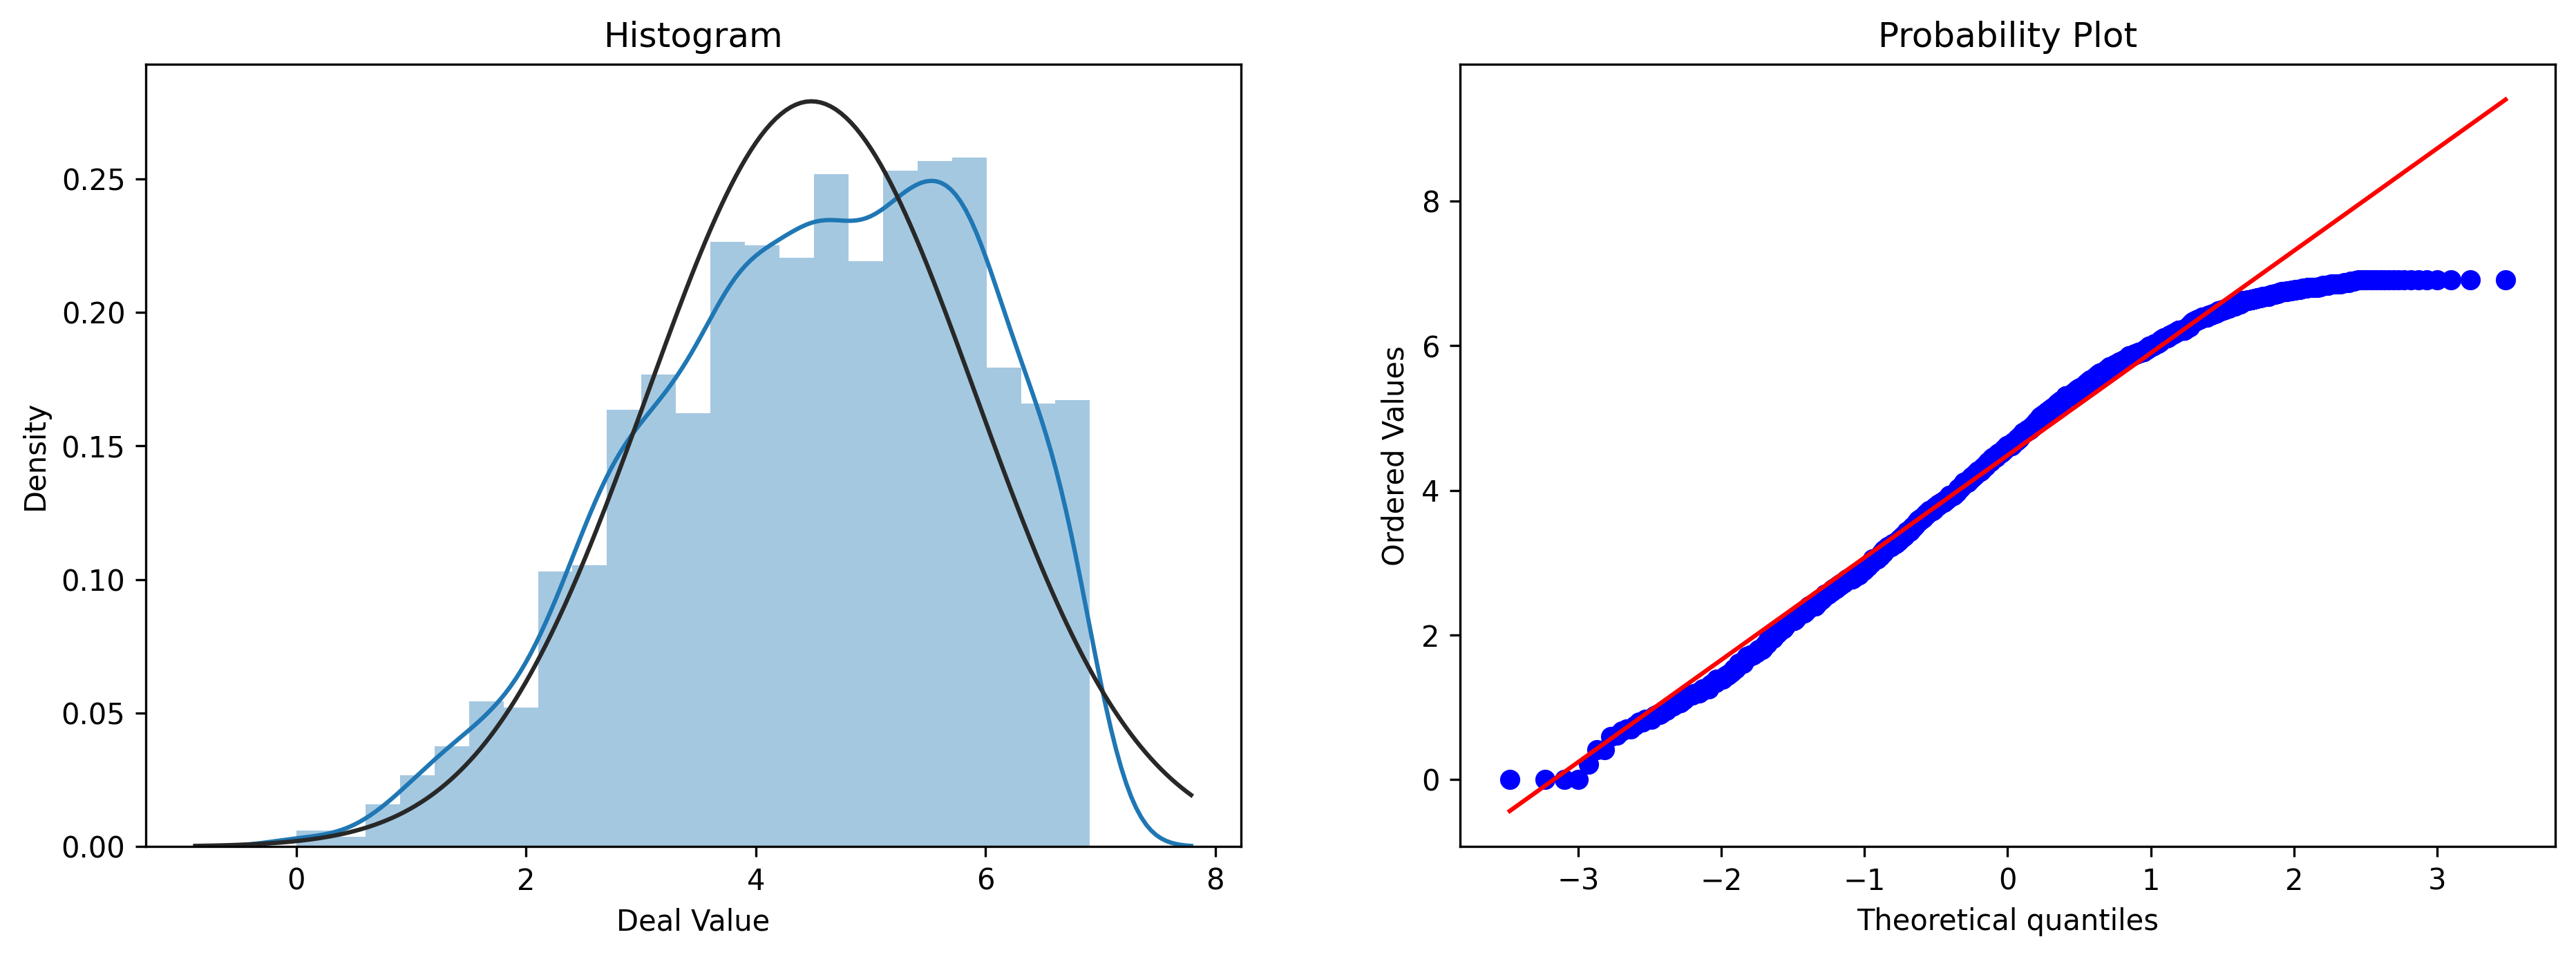

In [ ]:
print(f"Skewness Co-efficient: {round(df_final['Deal Value'].skew(), 3)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

##### HISTOGRAM #####
import seaborn as sns
from scipy import stats
sns.distplot(df_final['Deal Value'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

##### PROBABILITY / QQ PLOT #####
stats.probplot(df_final['Deal Value'], plot=ax2)

plt.show()

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_final = pd.DataFrame(imputer.fit_transform(df_final),columns = df_final.columns)

In [ ]:
#divide data into labels and attributes
X = df_final.drop(['Deal Value'],axis=1).values #independent variables
y = df_final['Deal Value'].values #dependent

In [ ]:
import random
random.seed(30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [ ]:
#Let's build our Linear Regressor
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
#Evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE. 
print('Mean Absolute Error:', metrics.mean_absolute_error(np.exp(y_test)-1, np.exp(y_pred)-1))  
print('Mean Squared Error:', metrics.mean_squared_error(np.exp(y_test)-1, np.exp(y_pred)-1)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.exp(y_test)-1, np.exp(y_pred)-1)))

Mean Absolute Error: 146.5238289328098
Mean Squared Error: 52377.249365506796
Root Mean Squared Error: 228.86076414603443


In [ ]:
# Labels are the values we want to predict
labels = np.array(df_final['Deal Value'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df_final.drop('Deal Value', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2062, 91)
Training Labels Shape: (2062,)
Testing Features Shape: (688, 91)
Testing Labels Shape: (688,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.exp(test_labels)-1, np.exp(predictions)-1)))

Root Mean Squared Error: 242.87032046373557


In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Index                Importance: 0.06
Variable: enterpriseValue_year+1 Importance: 0.05
Variable: earningsPerShare_year-1 Importance: 0.04
Variable: earningsPerShare_year+1 Importance: 0.04
Variable: currentRatio_year+1  Importance: 0.04
Variable: enterpriseValue_year-1 Importance: 0.04
Variable: stockPrice_year-1    Importance: 0.03
Variable: stockPrice_year      Importance: 0.03
Variable: stockPrice_year+1    Importance: 0.03
Variable: earningsPerShare_year Importance: 0.03
Variable: debtEquityRatio_year-1 Importance: 0.03
Variable: debtEquityRatio_year Importance: 0.03
Variable: debtEquityRatio_year+1 Importance: 0.03
Variable: netProfitMargin_year-1 Importance: 0.03
Variable: netProfitMargin_year Importance: 0.03
Variable: netProfitMargin_year+1 Importance: 0.03
Variable: inventoryTurnover_year-1 Importance: 0.03
Variable: inventoryTurnover_year Importance: 0.03
Variable: inventoryTurnover_year+1 Importance: 0.03
Variable: currentRatio_year-1  Importance: 0.03
Variable: c

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.1,subsample=0.8,
                          alpha = 10, n_estimators = 1000,max_depth=7,booster= 'gbtree',nthread=4,seed=45)

xgb.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=45,
             silent=None, subsample=0.8, verbosity=1)

In [ ]:
ygb =xgb.predict(X_test)
#Evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE. 
print('Mean Absolute Error:', metrics.mean_absolute_error(np.exp(y_test)-1, np.exp(ygb)-1))  
print('Mean Squared Error:', metrics.mean_squared_error(np.exp(y_test)-1, np.exp(ygb)-1)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.exp(y_test)-1, np.exp(ygb)-1)))

Mean Absolute Error: 153.4176332510688
Mean Squared Error: 59305.053018597224
Root Mean Squared Error: 243.52628814688


In [ ]:
first_level_train = pd.DataFrame(rf.predict(X_train), columns=['randomforest'])
first_level_train['xgbm'] = xgb.predict(X_train)
first_level_train['linreg'] = regressor.predict(X_train)

In [ ]:
first_level = pd.DataFrame(rf.predict(X_test), columns=['randomforest'])
first_level['xgbm'] = xgb.predict(X_test)
first_level['linreg'] = regressor.predict(X_test)

In [ ]:
meta_model = LinearRegression()

In [ ]:
meta_model.fit(first_level_train, y_train)
y_final = meta_model.predict(first_level)

In [ ]:
#Evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE. 
print('Mean Absolute Error:', metrics.mean_absolute_error(np.exp(y_test)-1, np.exp(y_final)-1))  
print('Mean Squared Error:', metrics.mean_squared_error(np.exp(y_test)-1, np.exp(y_final)-1)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.exp(y_test)-1, np.exp(y_final)-1)))

Mean Absolute Error: 153.49140272071244
Mean Squared Error: 59331.8502966824
Root Mean Squared Error: 243.5813012049209
